In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore

In [ ]:
file_path = '/content/netflix1.csv'
df = pd.read_csv(file_path)
print(df)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

In [ ]:
df = df.drop_duplicates()

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

<ipython-input-22-95918f46f840>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-22-95918f46f840>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
min_max_scaler = MinMaxScaler()
df[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): release_year    0.916667
Name: 0.25, dtype: float64
Q3 (75th percentile): release_year    0.979167
Name: 0.75, dtype: float64
IQR: release_year    0.0625
dtype: float64


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df_iqr = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

In [ ]:
z_scores = np.abs(zscore(df[numeric_cols]))
df_zs= df[(z_scores < 3).all(axis=1)]

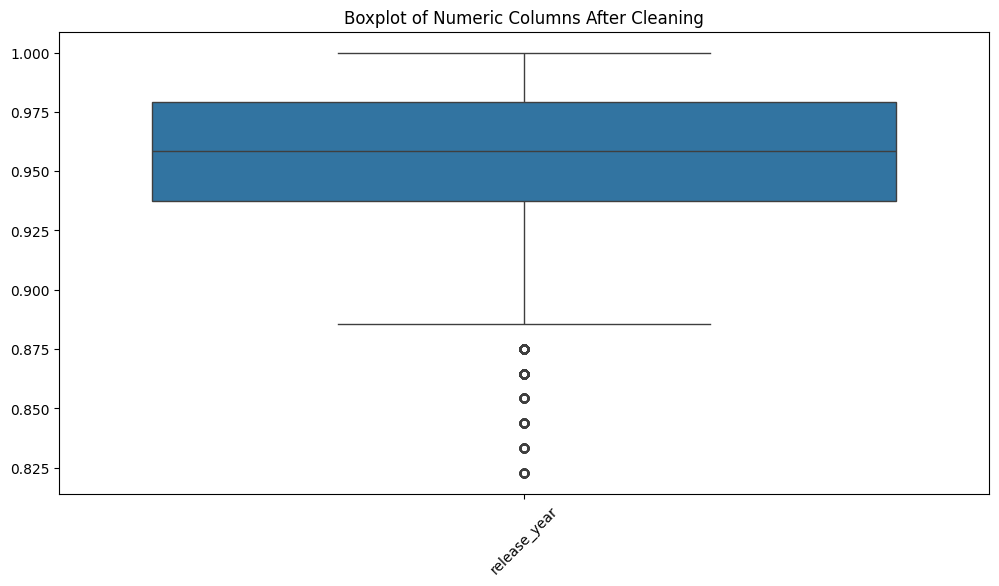

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns After Cleaning")
plt.xticks(rotation=45)
plt.show()

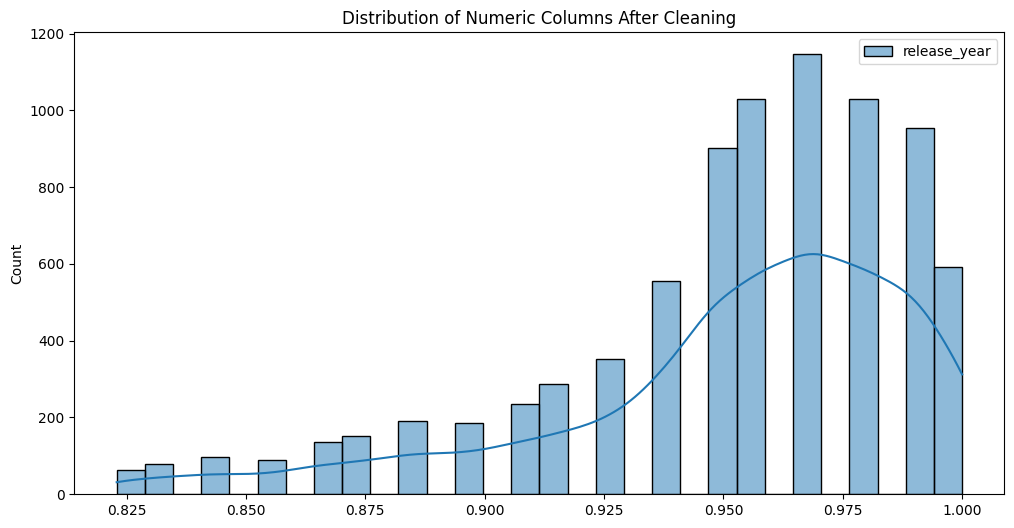

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[numeric_cols], bins=30, kde=True)
plt.title("Distribution of Numeric Columns After Cleaning")
plt.show()

<ipython-input-38-9dfd12d614da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


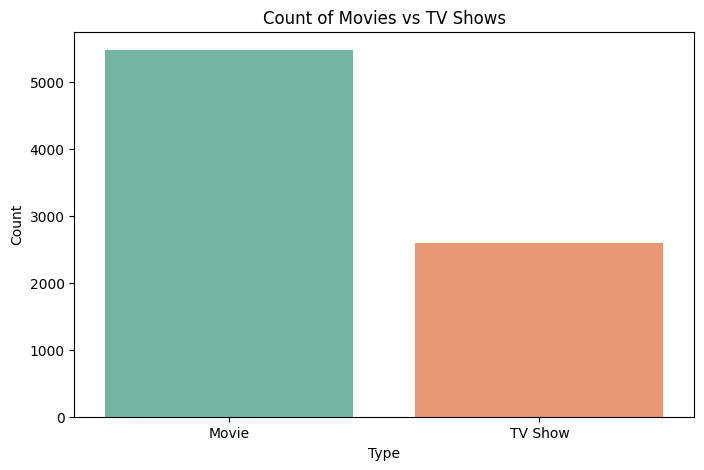

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

<ipython-input-39-ef5cc76ca721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')


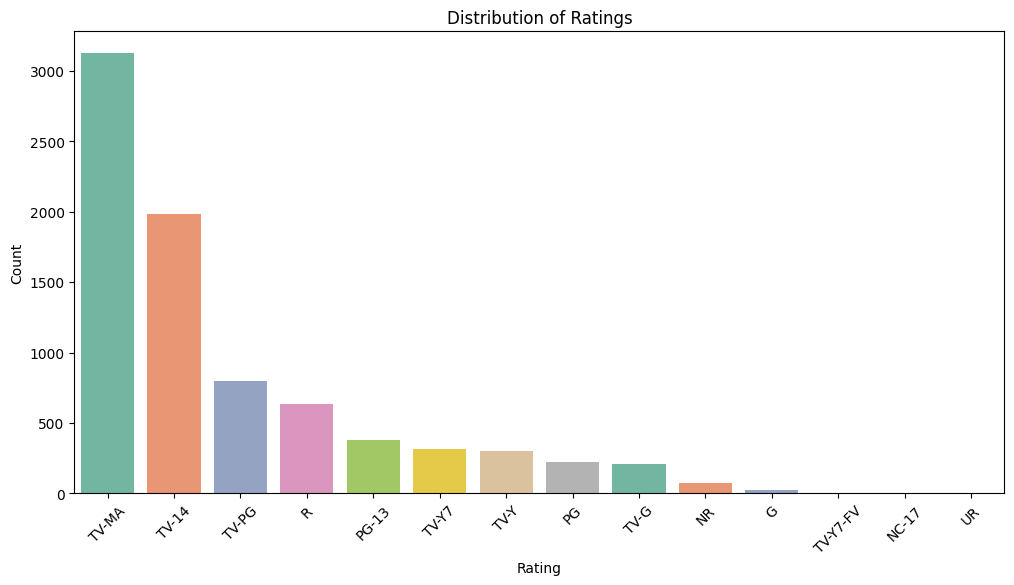

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.show()

<ipython-input-41-fca73ce2114e>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=year_trend.index, y=year_trend.values, marker='o', palette='Set2')


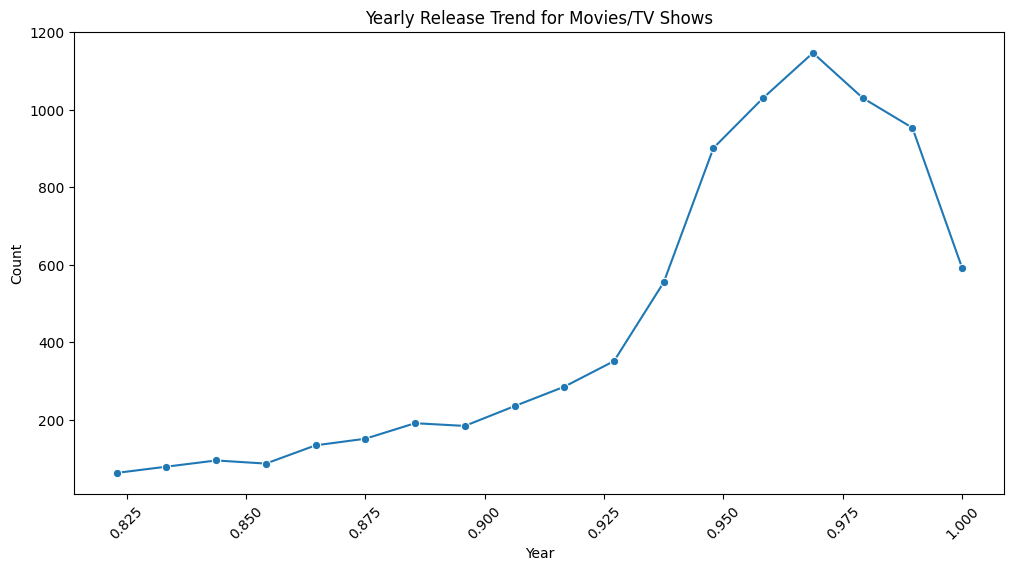

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')  # Ensure all release years are numeric
year_trend = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_trend.index, y=year_trend.values, marker='o', palette='Set2')
plt.title('Yearly Release Trend for Movies/TV Shows')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-04aa2a7585ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres, order=genres.value_counts().index, palette='Set2')


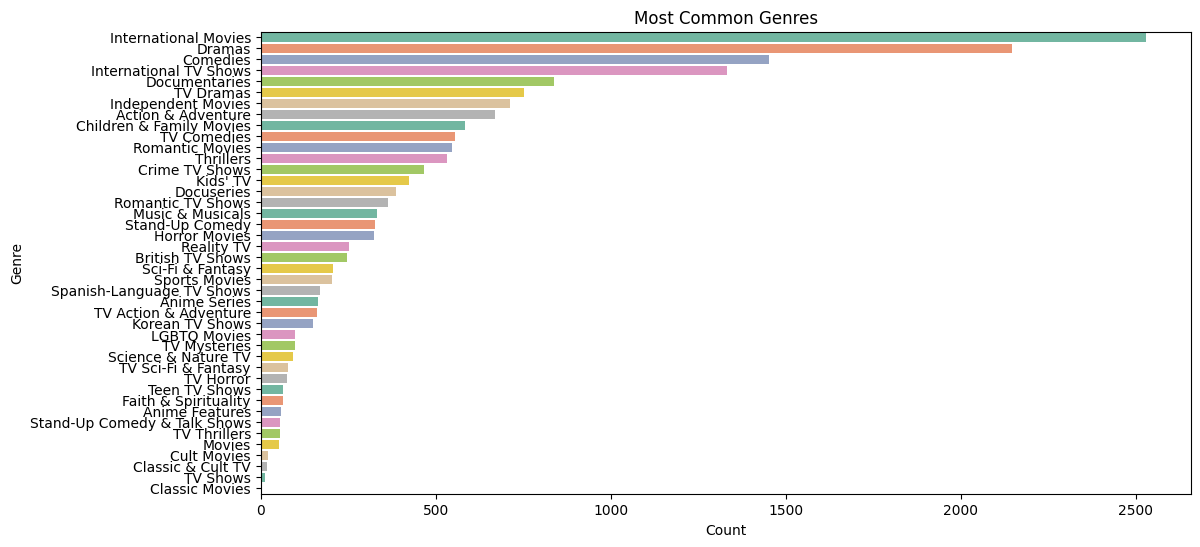

In [ ]:
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.countplot(y=genres, order=genres.value_counts().index, palette='Set2')
plt.title('Most Common Genres')
plt.ylabel('Genre')
plt.xlabel('Count')
plt.show()

<ipython-input-43-1c96b0146f01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration', data=df, palette='Set2')


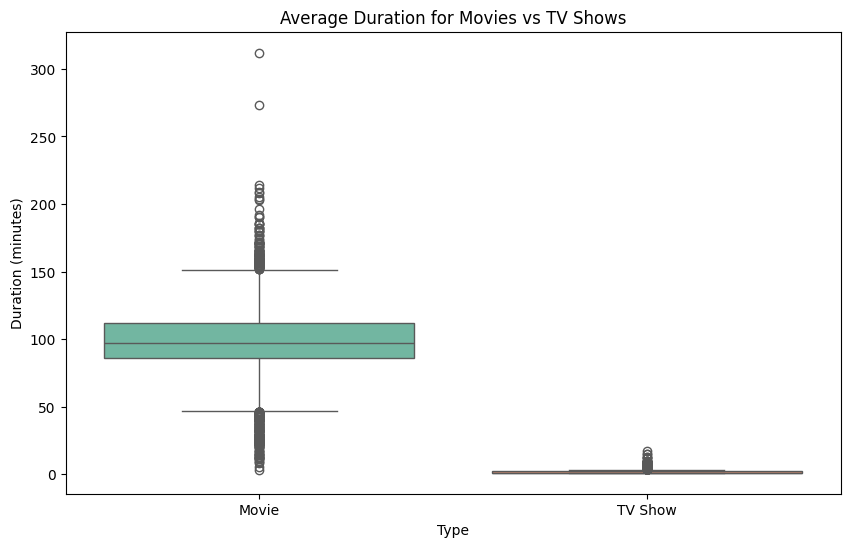

In [ ]:
df['duration'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration', data=df, palette='Set2')
plt.title('Average Duration for Movies vs TV Shows')
plt.ylabel('Duration (minutes)')
plt.xlabel('Type')
plt.show()